In [1]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import random 
import shutil 
import datetime
import re
import datetime
import numpy as np

In [ ]:
### For the random split 

# import os
# import shutil
# import random

# image_folder = 'images/images'
# annotation_folder = 'images/annotations'

# if not os.path.exists('new_app/train'):
#     os.makedirs('new_app/train')

# if not os.path.exists('new_app/test'):
#     os.makedirs('new_app/test')

# if not os.path.exists('new_app/unannotated'):
#     os.makedirs('new_app/unannotated')

# image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# # new list containing only the images which have annotations.
# images_with_annotations = [image for image in image_files if os.path.exists(os.path.join(annotation_folder, os.path.splitext(image)[0] + '.xml'))]

# # Move the images without annotations to the unannotated dir.
# for image in set(image_files) - set(images_with_annotations):
#     shutil.move(os.path.join(image_folder, image), 'new_app/unannotated')

# # Shuffle images
# random.shuffle(images_with_annotations)

# # Split ratio
# train_ratio = 0.9
# num_train = int(len(images_with_annotations) * train_ratio)

# # Split into train and test
# train_images = images_with_annotations[:num_train]
# test_images = images_with_annotations[num_train:]

# annotation_set = set()

# def copy_image_and_annotation(image, destination):

#     base_name = os.path.splitext(image)[0]
#     annotation_file = base_name + '.xml'
#     shutil.copy(os.path.join(image_folder, image), destination)
#     shutil.copy(os.path.join(annotation_folder, annotation_file), destination)
#     annotation_set.add(annotation_file)

# # Copy the train images and their corresponding annotations to train folder
# for image in train_images:
#     copy_image_and_annotation(image, 'new_app/train')

# # Copy the test images and their corresponding annotations to test folder
# for image in test_images:
#     copy_image_and_annotation(image, 'new_app/test')

# print("Images and annotations have been split into train and test folders.")
# print(f"Number of unique annotations: {len(annotation_set)}")


In [ ]:
# def split_dataset(image_dir, annotation_dir, train_ratio):
#     # Create directories for train, test, and unannotated datasets
#     os.makedirs('../data/train', exist_ok=True)
#     os.makedirs('../data/test', exist_ok=True)
#     os.makedirs('../data/unannotated', exist_ok=True)

#     # Gather all unique dates with annotations
#     annotated_dates = set()
#     for ann_filename in os.listdir(annotation_dir):
#         if ann_filename.endswith('.xml'):
#             base_name = os.path.splitext(ann_filename)[0]
#             image_filename = base_name + '.jpg'
#             if os.path.exists(os.path.join(image_dir, image_filename)):
#                 date = ann_filename.split('_')[0]  # Extract date from filename
#                 annotated_dates.add(date)

#     print(f"Found unique dates with annotations: {annotated_dates}")

#     # Convert dates to a list and shuffle
#     annotated_dates = list(annotated_dates)
#     random.shuffle(annotated_dates)

#     print(f"Shuffled annotated dates: {annotated_dates}")

#     # Split dates into train and test sets
#     total_dates = len(annotated_dates)
#     train_dates = set(annotated_dates[:int(total_dates * train_ratio)])
#     test_dates = set(annotated_dates[int(total_dates * train_ratio):])

#     print(f"Assigned {len(train_dates)} annotated dates to training set and {len(test_dates)} annotated dates to testing set.")

#     # Function to copy files to respective directories
#     def copy_files(date_set, dest_folder):
#         for date in date_set:
#             for filename in os.listdir(image_dir):
#                 if filename.startswith(date) and filename.endswith('.jpg'):
#                     base_name = os.path.splitext(filename)[0]
#                     image_path = os.path.join(image_dir, filename)
#                     annotations = [f for f in os.listdir(annotation_dir) if f.startswith(base_name) and f.endswith('.xml')]

#                     if annotations:
#                         shutil.copy(image_path, os.path.join('../data', dest_folder))
#                         print(f"Copied {filename} to ../data/{dest_folder}")
#                         for ann in annotations:
#                             ann_path = os.path.join(annotation_dir, ann)
#                             shutil.copy(ann_path, os.path.join('../data', dest_folder))
#                             print(f"Copied {ann} to ../data/{dest_folder}")

#     # Copy files to train and test directories
#     copy_files(train_dates, 'train')
#     copy_files(test_dates, 'test')

#     # Move images without annotations to unannotated directory
#     for filename in os.listdir(image_dir):
#         if filename.endswith('.jpg'):
#             base_name = os.path.splitext(filename)[0]
#             if not any(f.startswith(base_name) and f.endswith('.xml') for f in os.listdir(annotation_dir)):
#                 shutil.copy(os.path.join(image_dir, filename), '../data/unannotated')
#                 print(f"Copied {filename} to ../data/unannotated")

#     # Function to extract dates from a directory
#     def extract_dates_from_dir(directory):
#         dates = set()
#         for filename in os.listdir(directory):
#             if filename.endswith('.jpg') or filename.endswith('.xml'):
#                 date = filename.split('_')[0]
#                 dates.add(date)
#         return dates

#     # Verify the separation of dates
#     train_dir_dates = extract_dates_from_dir('../data/train')
#     test_dir_dates = extract_dates_from_dir('../data/test')
    
#     assert train_dir_dates == train_dates, "Mismatch in training dates"
#     assert test_dir_dates == test_dates, "Mismatch in testing dates"

#     print("Verification successful: Dates are correctly separated.")

#     return len(train_dates), len(test_dates)




In [ ]:
# Useful for seperating out the combined "images and annotations" into seperate folder. 

def separate_files(source_dir, images_dir, annotations_dir, image_ext='.jpg', xml_ext='.xml'):
    # Create target directories if they don't exist
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(annotations_dir, exist_ok=True)

    # List all files in the source directory
    for file in os.listdir(source_dir):
        file_path = os.path.join(source_dir, file)

        # Copy image files
        if file.endswith(image_ext):
            shutil.copy(file_path, os.path.join(images_dir, file))

        # Copy XML files
        elif file.endswith(xml_ext):
            shutil.copy(file_path, os.path.join(annotations_dir, file))




In [ ]:
source_directory = 'Calf_Detection/new_data/pairs_annotated_label_img_training_data'
images_directory = 'Calf_Detection/batch_images/batch_2/images'
annotations_directory = 'Calf_Detection/batch_images/batch_2/annotations'

separate_files(source_directory, images_directory, annotations_directory)

In [17]:
# Get unique set of dates from filenames
from datetime import datetime 

def extract_date_from_filename(filename):
    # Using regular expression to extract date from filename
    match = re.search(r'\d{4}-\d{2}-\d{2}', filename)
    return match.group() if match else None

def get_unique_dates(directory):
    unique_dates = set()
    for root, dirs, files in os.walk(directory):
        for file in files:
            date = extract_date_from_filename(file)
            if date:
                unique_dates.add(date)
    return unique_dates

def count_custom_weeks(unique_dates):
    date_objects = [datetime.strptime(date, '%Y-%m-%d').date() for date in unique_dates]
    date_objects.sort()

    weeks = []
    current_week = [date_objects[0]]

    for date in date_objects[1:]:
        if (date - current_week[0]).days <= 7:
            current_week.append(date)
        else:
            weeks.append(current_week)
            current_week = [date]
    
    if current_week:
        weeks.append(current_week)

    return len(weeks), weeks




In [18]:
# Define the main directory and subdirectories
main_directory = 'Calf_Detection/batch_images'
batch_1_images = os.path.join(main_directory, 'batch_1', 'images')
batch_2_images = os.path.join(main_directory, 'batch_2', 'images')

# Extract unique dates
unique_dates_batch_1 = get_unique_dates(batch_1_images)
unique_dates_batch_2 = get_unique_dates(batch_2_images)

# Combined unique dates
combined_unique_dates = unique_dates_batch_1.union(unique_dates_batch_2)

# Number of weeks
number_of_weeks, week_groups = count_custom_weeks(combined_unique_dates)

# Output results
print("Unique dates in Batch 1:", len(unique_dates_batch_1))
print("Unique dates in Batch 2:", len(unique_dates_batch_2))
print("Combined unique dates:", len(combined_unique_dates))

print("Number of weeks:", number_of_weeks)
# for i, week in enumerate(week_groups, 1):
#     print(f"Week {i}: {week}")


Unique dates in Batch 1: 254
Unique dates in Batch 2: 0
Combined unique dates: 254
Number of weeks: 37


In [3]:
# Clears the specific directories.

def clear_directory(directory_path):
    try:
        for filename in os.listdir(directory_path):
            file_path = os.path.join(directory_path, filename)
            if os.path.isfile(file_path):
                os.remove(file_path)
                print(f"Deleted file: {file_path}")
        print("Directory cleared successfully.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

In [4]:
directory_to_clear_1 = "Calf_Detection/data/train"
directory_to_clear_2 = "Calf_Detection/data/test"
directory_to_clear_3 = "Calf_Detection/data/unannotated"


clear_directory(directory_to_clear_1)
clear_directory(directory_to_clear_2)
clear_directory(directory_to_clear_3)

Directory cleared successfully.
Directory cleared successfully.
Directory cleared successfully.


In [2]:
# Should help in copying the weekly split images to the batch_images. 

def copy_images_with_annotations(root_dir, images_dest_dir, annotations_dest_dir):

    # Traverse through the root directory
    for subdir, dirs, files in os.walk(root_dir):
        for filename in files:
            # Check if the file is an image
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Construct the full file path
                file_path = os.path.join(subdir, filename)
                # Check if corresponding XML file exists
                xml_filename = os.path.splitext(filename)[0] + '.xml'
                xml_path = os.path.join(subdir, xml_filename)

                if os.path.exists(xml_path):
                    # Copy image and XML file to the specified directories
                    shutil.copy(file_path, images_dest_dir)
                    shutil.copy(xml_path, annotations_dest_dir)


In [3]:
copy_images_with_annotations('Calf_Detection/Pre_Processing/weekly_data_spllit', 'Calf_Detection/batch_images/batch_3/images', 'Calf_Detection/batch_images/batch_3/annotations')

In [15]:
# Should split the data into train and test along with the batch_boundary. 

def group_dates_by_week(dates):
    sorted_dates = sorted([datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates])
    grouped_weeks = []
    current_week = [sorted_dates[0]]

    for date in sorted_dates[1:]:
        if (date - current_week[0]).days <= 7:
            current_week.append(date)
        else:
            grouped_weeks.append(current_week)
            current_week = [date]

    if current_week:
        grouped_weeks.append(current_week)

    return grouped_weeks

def find_annotated_dates(image_dir, annotation_dir):
    annotated_dates = set()
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg'):
            base_name = os.path.splitext(filename)[0]
            annotations = [f for f in os.listdir(annotation_dir) if f.startswith(base_name) and f.endswith('.xml')]
            if annotations:
                date = filename.split('_')[0]
                annotated_dates.add(date)
    return annotated_dates

def move_boundary_files(week, dest_dir, image_dir, annotation_dir):
    os.makedirs(os.path.join(dest_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(dest_dir, 'annotations'), exist_ok=True)
    moved_files = 0

    for date in week:
        date_str = date.strftime("%Y-%m-%d")
        for filename in os.listdir(image_dir):
            if filename.startswith(date_str):
                shutil.move(os.path.join(image_dir, filename), os.path.join(dest_dir, 'images', filename))
                moved_files += 1

                # Move all corresponding XML files
                base_name = os.path.splitext(filename)[0]
                for ann_filename in os.listdir(annotation_dir):
                    if ann_filename.startswith(base_name) and ann_filename.endswith('.xml'):
                        shutil.move(os.path.join(annotation_dir, ann_filename), os.path.join(dest_dir, 'annotations', ann_filename))

    return moved_files

def split_dataset_by_weeks(image_dir, annotation_dir, output_dir, boundary_dir, train_ratio):
    # Create output directories
    os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'unannotated'), exist_ok=True)

    # Find annotated dates
    annotated_dates = find_annotated_dates(image_dir, annotation_dir)
    grouped_weeks = group_dates_by_week(list(annotated_dates))

    total_weeks = len(grouped_weeks)
    train_weeks_count = max(1, int(total_weeks * train_ratio))  # Ensure at least 1 week in training
    train_weeks = grouped_weeks[:train_weeks_count]
    test_weeks = grouped_weeks[train_weeks_count:]

    # Handle boundary weeks
    boundary_train_week = []
    boundary_test_week = []
    
    if train_weeks:
        boundary_train_week = train_weeks[-1][-4:] if len(train_weeks[-1]) >= 4 else train_weeks[-1]
    if test_weeks:
        boundary_test_week = test_weeks[0][:3] if len(test_weeks[0]) >= 3 else test_weeks[0]

    moved_from_train = move_boundary_files(boundary_train_week, boundary_dir, image_dir, annotation_dir) if boundary_train_week else 0
    moved_from_test = move_boundary_files(boundary_test_week, boundary_dir, image_dir, annotation_dir) if boundary_test_week else 0

    print(f"Moved {moved_from_train + moved_from_test} files to boundary set.")

    # Function to copy files
    def copy_files(date_set, dest_folder):
        dest_folder_path = os.path.join(output_dir, dest_folder)
        unique_pairs_copied = 0

        for date in date_set:
            for filename in os.listdir(image_dir):
                if filename.startswith(date) and filename.endswith('.jpg'):
                    base_name = os.path.splitext(filename)[0]
                    annotations = [f for f in os.listdir(annotation_dir) if f.startswith(base_name) and f.endswith('.xml')]
                    if annotations:
                        image_path = os.path.join(image_dir, filename)
                        dest_image_path = os.path.join(dest_folder_path, filename)
                        if not os.path.exists(dest_image_path):
                            shutil.copy(image_path, dest_image_path)
                            for ann_filename in annotations:
                                ann_path = os.path.join(annotation_dir, ann_filename)
                                shutil.copy(ann_path, dest_folder_path)
                            unique_pairs_copied += 1

        return unique_pairs_copied

    # Copy files to train and test directories
    train_dates = set(date.strftime("%Y-%m-%d") for week in train_weeks for date in week if date not in boundary_train_week)
    test_dates = set(date.strftime("%Y-%m-%d") for week in test_weeks for date in week if date not in boundary_test_week)

    copied_to_train = copy_files(train_dates, 'train')
    copied_to_test = copy_files(test_dates, 'test')

    # Handle unannotated files
    unannotated_count = 0
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg'):
            base_name = os.path.splitext(filename)[0]
            xml_files = [f for f in os.listdir(annotation_dir) if f.startswith(base_name) and f.endswith('.xml')]
            if not xml_files and datetime.datetime.strptime(filename.split('_')[0], "%Y-%m-%d") not in boundary_train_week + boundary_test_week:
                image_path = os.path.join(image_dir, filename)
                dest_path = os.path.join(output_dir, 'unannotated', filename)
                if not os.path.exists(dest_path):
                    shutil.copy(image_path, dest_path)
                    unannotated_count += 1

    print(f"Number of weeks used for training: {train_weeks_count}")
    print(f"Number of weeks used for testing: {total_weeks - train_weeks_count}")
    print(f"Copied {copied_to_train} unique pairs to training set.")
    print(f"Copied {copied_to_test} unique pairs to testing set.")
    print(f"Copied {unannotated_count} new files to unannotated.")

    return len(train_dates), len(test_dates)


In [10]:
# Paths for the batch_1.
batch_image_dir = 'Calf_Detection/batch_images/batch_1/images'
batch_annotation_dir = 'Calf_Detection/batch_images/batch_1/annotations'
output_dir = 'Calf_Detection/data'
boundary_dir='Calf_Detection/batch_images/batch_boundary'

train_count_batch, test_count_batch = split_dataset_by_weeks(batch_image_dir, batch_annotation_dir, output_dir, boundary_dir, 0.8)
print(f'Batch 1 - Training dates: {train_count_batch}, Testing dates: {test_count_batch}')


Moved 17 files to boundary set.
Number of weeks used for training: 23
Number of weeks used for testing: 6
Copied 1593 unique pairs to training set.
Copied 41 unique pairs to testing set.
Copied 2639 new files to unannotated.
Batch 1 - Training dates: 80, Testing dates: 16


In [16]:
# Paths for the batch_2.
batch_image_dir = 'Calf_Detection/batch_images/batch_2/images'
batch_annotation_dir = 'Calf_Detection/batch_images/batch_2/annotations'
output_dir = 'Calf_Detection/data'
boundary_dir='Calf_Detection/batch_images/batch_boundary'

train_count_batch, test_count_batch = split_dataset_by_weeks(batch_image_dir, batch_annotation_dir, output_dir, boundary_dir, 0.8)
print(f'Batch 2 - Training dates: {train_count_batch}, Testing dates: {test_count_batch}')


Moved 1016 files to boundary set.
Number of weeks used for training: 1
Number of weeks used for testing: 0
Copied 0 unique pairs to training set.
Copied 0 unique pairs to testing set.
Copied 0 new files to unannotated.
Batch 2 - Training dates: 0, Testing dates: 0


In [ ]:
# Paths for the batch_3.
batch_image_dir = 'Calf_Detection/batch_images/batch_3/images'
batch_annotation_dir = 'Calf_Detection/batch_images/batch_3/annotations'
output_dir = 'Calf_Detection/data'
boundary_dir='Calf_Detection/batch_images/batch_boundary'

train_count_batch, test_count_batch = split_dataset_by_weeks(batch_image_dir, batch_annotation_dir, output_dir, boundary_dir, 0.8)
print(f'Batch 2 - Training dates: {train_count_batch}, Testing dates: {test_count_batch}')


In [20]:
# Should help in counting number of images for training and testing. 
def count_files_in_directory(directory_path):
    if not os.path.exists(directory_path):
        print(f"Directory '{directory_path}' does not exist.")
        return

    file_count = sum(1 for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file)))
    file_count = (file_count)/ 2 # since the folder contains both annotations and images.
    return file_count

In [21]:
train_dir='Calf_Detection/data/train'
test_dir='Calf_Detection/data/test'
unnannotated_dir='Calf_Detection/data/unannotated'

print("Number of images after splitting")
file_directories=[train_dir,test_dir,unnannotated_dir]
for each_dir in file_directories:
    if each_dir != unnannotated_dir:
        count_files_in_directory(each_dir)
        print(f"Images in {each_dir}: {count_files_in_directory(each_dir)}")
    else:
        count_files_in_directory(each_dir)
        print(f"Images in {each_dir}: {count_files_in_directory(each_dir)*2}")

Number of images after splitting
Images in Calf_Detection/data/train: 1593.0
Images in Calf_Detection/data/test: 41.0
Images in Calf_Detection/data/unannotated: 2639.0


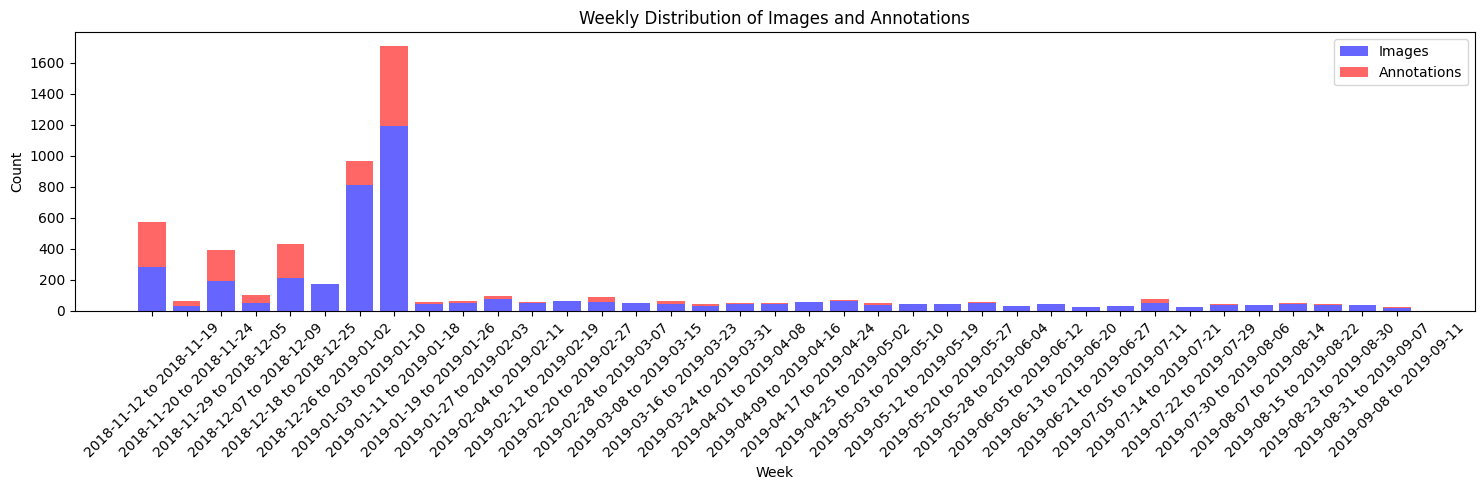

In [24]:
import os
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

def analyze_distribution(image_dir, annotation_dir):
    distribution = defaultdict(lambda: {'images': 0, 'annotations': 0})

    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg'):
            date = filename.split('_')[0]
            distribution[date]['images'] += 1

    for filename in os.listdir(annotation_dir):
        if filename.endswith('.xml'):
            date = filename.split('_')[0]
            distribution[date]['annotations'] += 1

    return distribution

def group_dates_by_week(dates):
    sorted_dates = sorted([datetime.strptime(date, "%Y-%m-%d") for date in dates])
    grouped_weeks = []
    current_week = [sorted_dates[0]]

    for date in sorted_dates[1:]:
        if (date - current_week[0]).days <= 7:
            current_week.append(date)
        else:
            grouped_weeks.append(current_week)
            current_week = [date]

    if current_week:
        grouped_weeks.append(current_week)

    return grouped_weeks

def plot_weekly_distribution(distribution):
    weekly_counts = defaultdict(lambda: {'images': 0, 'annotations': 0})
    grouped_weeks = group_dates_by_week(list(distribution.keys()))

    for week in grouped_weeks:
        week_label = f"{week[0].strftime('%Y-%m-%d')} to {week[-1].strftime('%Y-%m-%d')}"
        for date in week:
            date_str = date.strftime("%Y-%m-%d")
            weekly_counts[week_label]['images'] += distribution[date_str]['images']
            weekly_counts[week_label]['annotations'] += distribution[date_str]['annotations']

    weeks = list(weekly_counts.keys())
    image_counts = [weekly_counts[week]['images'] for week in weeks]
    annotation_counts = [weekly_counts[week]['annotations'] for week in weeks]

    plt.figure(figsize=(15, 5))
    plt.bar(weeks, image_counts, color='blue', alpha=0.6, label='Images')
    plt.bar(weeks, annotation_counts, color='red', alpha=0.6, label='Annotations', bottom=image_counts)

    plt.xlabel('Week')
    plt.ylabel('Count')
    plt.title('Weekly Distribution of Images and Annotations')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    
# Function call 
image_dir = 'Calf_Detection/batch_images/batch_1/images'
annotation_dir = 'Calf_Detection/batch_images/batch_1/annotations'
distribution = analyze_distribution(image_dir, annotation_dir)
plot_weekly_distribution(distribution)


In [4]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        
        filename = root.find('filename').text  # Extract the filename
        
        for member in root.findall('object'):
            name = member.find('name').text
            pose = member.find('pose').text
            truncated = int(member.find('truncated').text)
            difficult = int(member.find('difficult').text)
            
            value = (filename,# filename
                     int(root.find('size')[0].text),# width
                     int(root.find('size')[1].text), # height
                     name,# class
                     int(member.find('bndbox')[0].text), # xmin
                     int(member.find('bndbox')[1].text), # ymin
                     int(member.find('bndbox')[2].text),# xmax
                     int(member.find('bndbox')[3].text) # ymax
                     )
            xml_list.append(value)
    
    column_name = ['filename', 'width', 'height', 'class','xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


In [ ]:
for folder in [train_dir,test_dir]:
    image_path = os.path.join(os.getcwd(), folder)
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv((folder + '_labels.csv'), index=None)
    print('Successfully converted xml to csv.')


In [ ]:
import csv
import re

def extract_strings(input_string):
    pattern = r'(.*?)(?:/train|/test)'
    matches = re.findall(pattern, input_string)
    extracted_strings = [match for match in matches if match]

    return extracted_strings

extracted=extract_strings(train_dir)

with open(str(extracted[0])+"/train_labels.csv", 'r') as csv_file:
    reader=csv.reader(csv_file)
    column_names=next(reader)
    for column in column_names:
        print(column)